# Graduate admission prediction

## Loading the data

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\rezaa\Desktop\archive\Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
df.shape

(500, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Converting data from pandas DataFrame to numpy array

In [6]:
X = df.drop(labels=['Serial No.','Chance of Admit '],axis=1).values
y = df.iloc[:,-1]

## Using MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

## Making a ANN with 4 layers with relue activation and 56, 14, 7 and 1 neurons.

In [9]:
from tensorflow.keras import Sequential
model = Sequential()

In [10]:
from tensorflow.keras.layers import Dense,Dropout
model.add(Dense(28,activation='relu',input_dim=7))
model.add(Dense(14,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                224       
                                                                 
 dense_1 (Dense)             (None, 14)                406       
                                                                 
 dense_2 (Dense)             (None, 3)                 45        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 679
Trainable params: 679
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse',optimizer='Adam')

In [12]:
history = model.fit(X_train,y_train,validation_split=0.20,epochs=50,verbose=False)

## Calculating R2 score

In [13]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

4/4 [==============================] - 0s 4ms/step


0.8117923516633749

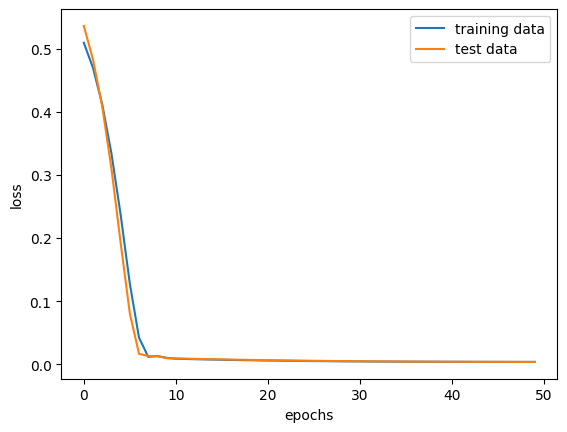

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training data','test data'])